In [1]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot 

In [2]:
#compute the  Loss
def loss(w, x, y):
    c=0.9
    loss_sum = 0
    for i in range(len(y)):  
        temp = y[i][0] * np.dot(x[i], w).sum()
        if temp < 1:
            loss_sum += 1 - temp
    loss_sum *= c
    W = 0 
    for var in w:
        W += var**2
    loss_sum += W/2
    return loss_sum / y.shape[0]

In [3]:
#compute the gradient
def gradient(w, x, y):
    i = np.random.randint(0, y.shape[0])
    grad_sum = np.zeros(w.shape)
    c = 0.9

    # compute wx
    temp = np.dot(x[i], w)

    if y[i][0] * temp < 1:
        grad_sum += (y[i][0] * x[i] * c).reshape(grad_sum.shape)

    gradient = w - grad_sum
    #print(gradient)
    return gradient


In [4]:
# NAG method
def nag(W,x_train,y_train,x_test,y_test,alpha,iterations):
   #  n,m=x_train.shape
   #  W = np.zeros((m,1)) # weights
    pre_d = np.zeros_like(W)
    pre_grad = np.zeros_like(W)
    gamma =0.9 # momentum factor 
    loss_nag =[]; 
    for i in range(iterations):     
        loss_train=loss(W,x_train,y_train)
        loss_validation=loss(W,x_test,y_test)
        grad=gradient(W,x_train,y_train)
        loss_nag.append (loss_validation)
  
        # udate parameter
        d  = gamma * pre_d  + grad + gamma * (grad - pre_grad)
        dW = -alpha * d
        W += dW 
        pre_d = d
        pre_grad = grad
    
    loss_nag=np.array(loss_nag)
    #print(loss_nag)
   # loss_nag=loss_nag[:,:,0]

    return loss_nag


In [5]:
# RMSProp  
def rmsprop(W,x_train,y_train,x_test,y_test,alpha,iterations):
   #  n,m=x_train.shape
   #  W = np.zeros((m,1)) # weights
    n = np.zeros_like(W)
    gamma =0.9 # decay factor 
    epsilon = 0.001 # in case of the denominator equaling to 0
    loss_rms =[]  # validation loss

    for t in range(iterations):
        loss_train=loss(W,x_train,y_train)
        loss_validation=loss(W,x_test,y_test)
        grad=gradient(W,x_train,y_train)
        loss_rms.append (loss_validation)
    
        # update parameter
        n = gamma * n + (1-gamma) * np.power(grad,2)
        dW = -alpha /np.sqrt(n + epsilon ) * grad
        W += dW 
    
    loss_rms=np.array(loss_rms)
   # loss_rms=loss_rms[:,:,0]
    return loss_rms

In [6]:
# AdaDelta   
def adaDelta(W,x_train,y_train,x_test,y_test,iterations):   
  #   n,m=x_train.shape
   #  W = np.zeros((m,1)) # weights
    E_g2 = np.zeros_like(W)
    E_dW2 = np.zeros_like(W)
    gamma =0.95 
    epsilon = 1e-6# 
    loss_adad =[]  

    for t in range(iterations):

        loss_train=loss(W,x_train,y_train)
        loss_validation=loss(W,x_test,y_test)
        grad=gradient(W,x_train,y_train)
        loss_adad.append (loss_validation)
        
        # update parameter
        E_g2 = gamma * E_g2 + (1-gamma) * np.power(grad,2)
        dW = - np.sqrt(E_dW2+epsilon) / np.sqrt(E_g2+epsilon) * grad    
        W += dW 
        E_dW2 = gamma * E_dW2 + (1-gamma) * np.power(dW , 2)
    
    loss_adad=np.array(loss_adad)
    #loss_adad=loss_adad[:,:,0]
    return loss_adad

In [7]:
# Adam method
def adam(W,x_train,y_train,x_test,y_test,alpha,iterations):  
    n = np.zeros_like(W)
    m = np.zeros_like(W)
    beta = 0.9 
    gamma = 0.9  
    epsilon = 1e-3 
    loss_adam=[]  

    for i in range(iterations):
        loss_train=loss(W,x_train,y_train)
        loss_validation=loss(W,x_test,y_test)
        grad=gradient(W,x_train,y_train)
        loss_adam.append (loss_validation)
    
        # update paratemer
        m = beta * m + (1-beta) * grad 
        n = gamma  * n + (1-gamma) * np.power(grad,2) 
        m_hat = m / (1-np.power(beta,i)+epsilon) 
        n_hat = n / (1-np.power(gamma,i)+epsilon)
        W -= m_hat * alpha /(np.sqrt(n_hat) + epsilon)   
    loss_adam=np.array(loss_adam)
    #loss_adam=loss_adam[:,:,0]
    return loss_adam
    


In [8]:
# Load the experiment data
data=load_svmlight_file(r'a9a')
data_test=load_svmlight_file(r'a9a_test')
y=data[1]
X=data[0]
X=X.todense()
y=np.reshape(y,(len(y),1))
y=np.mat(y)
X=np.hstack((X,np.ones((len(y),1))))
y_test=data_test[1]
X_test=data_test[0]
X_test=X_test.todense()
y_test=np.reshape(y_test,((len(y_test),1)))
X_test=np.hstack((X_test,np.zeros((len(y_test),1))))
X_test=np.hstack((X_test,np.ones((len(y_test),1))))

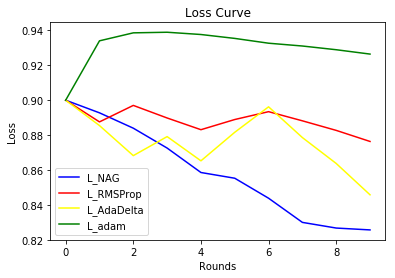

In [10]:
# Initialize parameter   
iterations=10
alpha = 0.001# learning rate
alpha_nag = 0.001# learning rate
alpha_rms=0.001
alpha_adam=0.001
n,m=X.shape
x_train=X
y_train=y
x_test=X_test
W = np.zeros((m,1)) # weights
loss_nag=nag(W,x_train, y_train, x_test, y_test,alpha_nag,iterations)
W = np.zeros((m,1)) # weights
loss_rms=rmsprop(W,x_train, y_train, x_test, y_test,alpha_rms,iterations)
W = np.zeros((m,1)) # weights
loss_adad=adaDelta(W,x_train, y_train, x_test, y_test,iterations)
W = np.zeros((m,1)) # weights
loss_adam=adam(W,x_train, y_train, x_test, y_test,alpha_adam,iterations)
pyplot.plot(loss_nag,'blue',label='L_NAG')
pyplot.plot(loss_rms,'red',label='L_RMSProp')
pyplot.plot(loss_adad,'yellow',label='L_AdaDelta')
pyplot.plot(loss_adam,'green',label='L_adam')
pyplot.title('Loss Curve')              
pyplot.xlabel('Rounds')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()